In [1]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway, mannwhitneyu
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
f1, p1 = f_oneway([30,40,50,60],[25,30,50,55],[25,30,40,45])


In [3]:
p1

0.5483227164089495

In [4]:
f2, p2 = f_oneway([43,45,45,47],[37,40,40,43],[34,35,35,36])
p2

7.970844367886858e-05

In [5]:
f2

32.14285714285714

In [6]:
F=pd.read_csv('fair_pay_data.csv',index_col=0)
F.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [7]:
F['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [8]:
F1=F.groupby('job_level')
F1_sal=F1.get_group('Salaried')
F1_Hour=F1.get_group('Hourly')
F1_Mgr=F1.get_group('Manager')

In [9]:
f_val,p_val=f_oneway(F1_sal['salary'],F1_Hour['salary'],F1_Mgr['salary'])

In [16]:
print(p_val)

0.0


In [11]:
shapiro(F1_sal['salary'])

(0.9546262621879578, 1.6898590970981786e-08)

In [12]:
shapiro(F1_Hour['salary'])

(0.9713829159736633, 1.9065220864707133e-13)

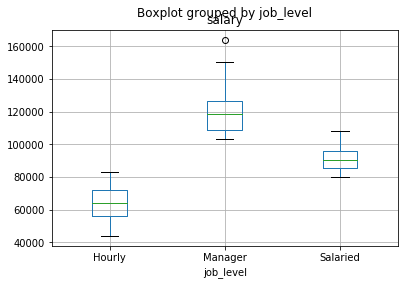

In [13]:
F.boxplot(column='salary',by='job_level')

In [14]:
t_val,p_val_t=mannwhitneyu(F1_sal['salary'],F1_Hour['salary'])
print(p_val_t)

9.044609362547591e-164
